In [9]:
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gmaps
from pprint import pprint
from config import gkey
from config import api_key

In [10]:
#read all Csv files from each Location
west_data = (pd.read_csv('data/SanFrancisco.csv')).drop(columns=['Unnamed: 0', 'Business ID'])
east_data = (pd.read_csv('data/NewYork.csv')).drop(columns=['Unnamed: 0', 'Business ID'])
south_data = (pd.read_csv('data/AustinTX.csv')).drop(columns=['Unnamed: 0', 'Business ID'])
north_data = (pd.read_csv('data/Chicago.csv')).drop(columns=['Unnamed: 0', 'Business ID'])

In [20]:
merged_table_df = pd.concat([west_data, east_data, south_data, north_data], ignore_index=True)

In [21]:
rating_group_df = 

,Business,City,State,Category,Latitude,Longitude,Price,Reviews,Rating
0,Bi-Rite Creamery,San Francisco,CA,Ice Cream & Frozen Yogurt,37.761591,-122.425717,1,9522,4.5
1,Brenda's French Soul Food,San Francisco,CA,French,37.782902,-122.419043,2,10740,4.0
2,Gary Danko,San Francisco,CA,American (New),37.805870,-122.420580,4,5439,4.5
3,Tartine Bakery & Cafe,San Francisco,CA,Bakeries,37.761425,-122.424051,2,7768,4.0
4,Hog Island Oyster Co,San Francisco,CA,Seafood,37.795831,-122.393303,2,5819,4.5
...,...,...,...,...,...,...,...,...,...
2692,Ruby's Fast Food,Chicago,IL,Filipino,41.961260,-87.722150,1,242,4.5
2693,The Berghoff Restaurant,Chicago,IL,Bars,41.879333,-87.628668,2,1015,3.5
2694,5 Rabanitos Restaurante and Taqueria,Chicago,IL,Mexican,41.857971,-87.670952,2,428,4.0
2695,South Coast Sushi,Chicago,IL,Sushi Bars,41.858902,-87.624275,2,514,4.0


# Group Table Analysis

In [25]:
merged_table_df.head()

,Business,City,State,Category,Latitude,Longitude,Price,Reviews,Rating
0,Bi-Rite Creamery,San Francisco,CA,Ice Cream & Frozen Yogurt,37.761591,-122.425717,1,9522,4.5
1,Brenda's French Soul Food,San Francisco,CA,French,37.782902,-122.419043,2,10740,4.0
2,Gary Danko,San Francisco,CA,American (New),37.805870,-122.420580,4,5439,4.5
3,Tartine Bakery & Cafe,San Francisco,CA,Bakeries,37.761425,-122.424051,2,7768,4.0
4,Hog Island Oyster Co,San Francisco,CA,Seafood,37.795831,-122.393303,2,5819,4.5


In [65]:
#this will yeild broken down by state and price averages
# grouped_merged_df = merged_table_df.groupby(['State', 'Price'])

#this will break down by ratings in states.
# grouped_merged_df = merged_table_df.groupby(['State', 'Rating'])

#this will breakdown by state, ratings and price and offer price by rating
grouped_merged_df = merged_table_df.groupby(['State', 'Price', 'Rating'])

#this changed to the grouping of the categories, Just redundant to the individual dataframes.
# grouped_merged_df = merged_table_df.groupby(['State', 'Category', 'Rating'])

In [66]:
total_grouped_categories = grouped_merged_df['Category'].count()
grouped_price_avg = grouped_merged_df['Price'].mean()
grouped_reviews_count = grouped_merged_df['Reviews'].mean()
total_grouped_review_counts = grouped_merged_df['Reviews'].count()
average_grouped_ratings = grouped_merged_df['Rating'].mean()

In [94]:
grouped_category_stats_df= pd.DataFrame({
    "Number of Restaurants by Category": total_grouped_categories,
    "Average Price By Category": grouped_price_avg,
    "Average # of Reviews per Restaurant": grouped_reviews_count.astype(int),
    "Average Ratings by Category": average_grouped_ratings
})
grouped_category_stats_df
# df.astype(int)
# grouped_category_stats_df.style.format({"Average # of Reviews per Restaurant": "{:}"})

Number of Restaurants by Category  \
State Price Rating                                      
CA    1     3.5                                     4   
            4.0                                    60   
            4.5                                    67   
            5.0                                     9   
      2     3.5                                    18   
            4.0                                   203   
            4.5                                    85   
            5.0                                     2   
      3     3.5                                    11   
            4.0                                    54   
            4.5                                    16   
      4     4.0                                     8   
            4.5                                    12   
IL    1     3.5                                     1   
            4.0                                    39   
            4.5                                    66   
            5.0                                     9   
      2     3.5                                    25   
            4.0                                   260   
            4.5                                   104   
            5.0                                     6   
      3     3.5                                     2   
            4.0                                    53   
            4.5                                    16   
            5.0                                     1   
      4     3.5                                     1   
            4.0                                     9   
            4.5                                     6   
            5.0                                     1   
NY    1     3.5                                     7   
            4.0                                    81   
            4.5                                    73   
            5.0                                     6   
      2     3.0                                     3   
            3.5                                    64   
            4.0                                   391   
            4.5                                   147   
            5.0                                     3   
      3     3.5                                    20   
            4.0                                   111   
            4.5                                    41   
            5.0                                     1   
      4     3.5                                     3   
            4.0                                    28   
            4.5                                    21   
TX    1     3.5                                     8   
            4.0                                    88   
            4.5                                   104   
            5.0                                    17   
      2     3.0                                     2   
            3.5                                    45   
            4.0                                   149   
            4.5                                    89   
            5.0                                     3   
      3     4.0                                    27   
            4.5                                    14   
      4     4.0                                     1   
            4.5                                     2   

                    Average Price By Category  \
State Price Rating                              
CA    1     3.5                             1   
            4.0                             1   
            4.5                             1   
            5.0                             1   
      2     3.5                             2   
            4.0                             2   
            4.5                             2   
            5.0                             2   
      3     3.5                             3   
            4.0                             3   
           

In [93]:
rounded = grouped_category_stats_df.pd.set_option('precision', 0)

AttributeError: 'DataFrame' object has no attribute 'pd'

In [7]:
#new york
grouped_east_df = east_data.groupby('Category')

In [8]:
#counts the total of each category within the column
total_east_category = grouped_east_df['Category'].count()
#gets the average amount of reviews by category
east_price_avg = grouped_east_df['Price'].mean()
east_review_counts = grouped_east_df['Reviews'].mean()
east_review_counts.head()
#avg star rating
east_rating_counts = grouped_east_df['Rating'].mean()

In [9]:
#This will populate an array of all categories in Sample.
east_category_unique = east_data["Category"].unique()
east_category_unique #121 unique categories
east_total_categories = len(east_category_unique)

In [10]:
east_category_stats_df= pd.DataFrame({
    "Number of Restaurants": total_east_category,
    "Average Price of Category": east_price_avg,
    "Average # of Reviews per Restaurant": east_review_counts,
    "Percentage of Ratings": east_rating_counts
})
east_category_stats_df

,Number of Restaurants,Average Price of Category,Average # of Reviews per Restaurant,Percentage of Ratings
Category,,,,
Afghan,1,2.000000,472.000000,4.000000
American (New),59,2.762712,1135.677966,4.067797
American (Traditional),17,2.176471,1206.764706,3.852941
Argentine,1,3.000000,519.000000,4.000000
Art Museums,3,1.000000,1169.000000,4.500000
...,...,...,...,...
Venezuelan,1,2.000000,2539.000000,4.000000
Venues & Event Spaces,2,2.500000,614.500000,4.250000
Vietnamese,7,1.857143,1081.428571,4.071429


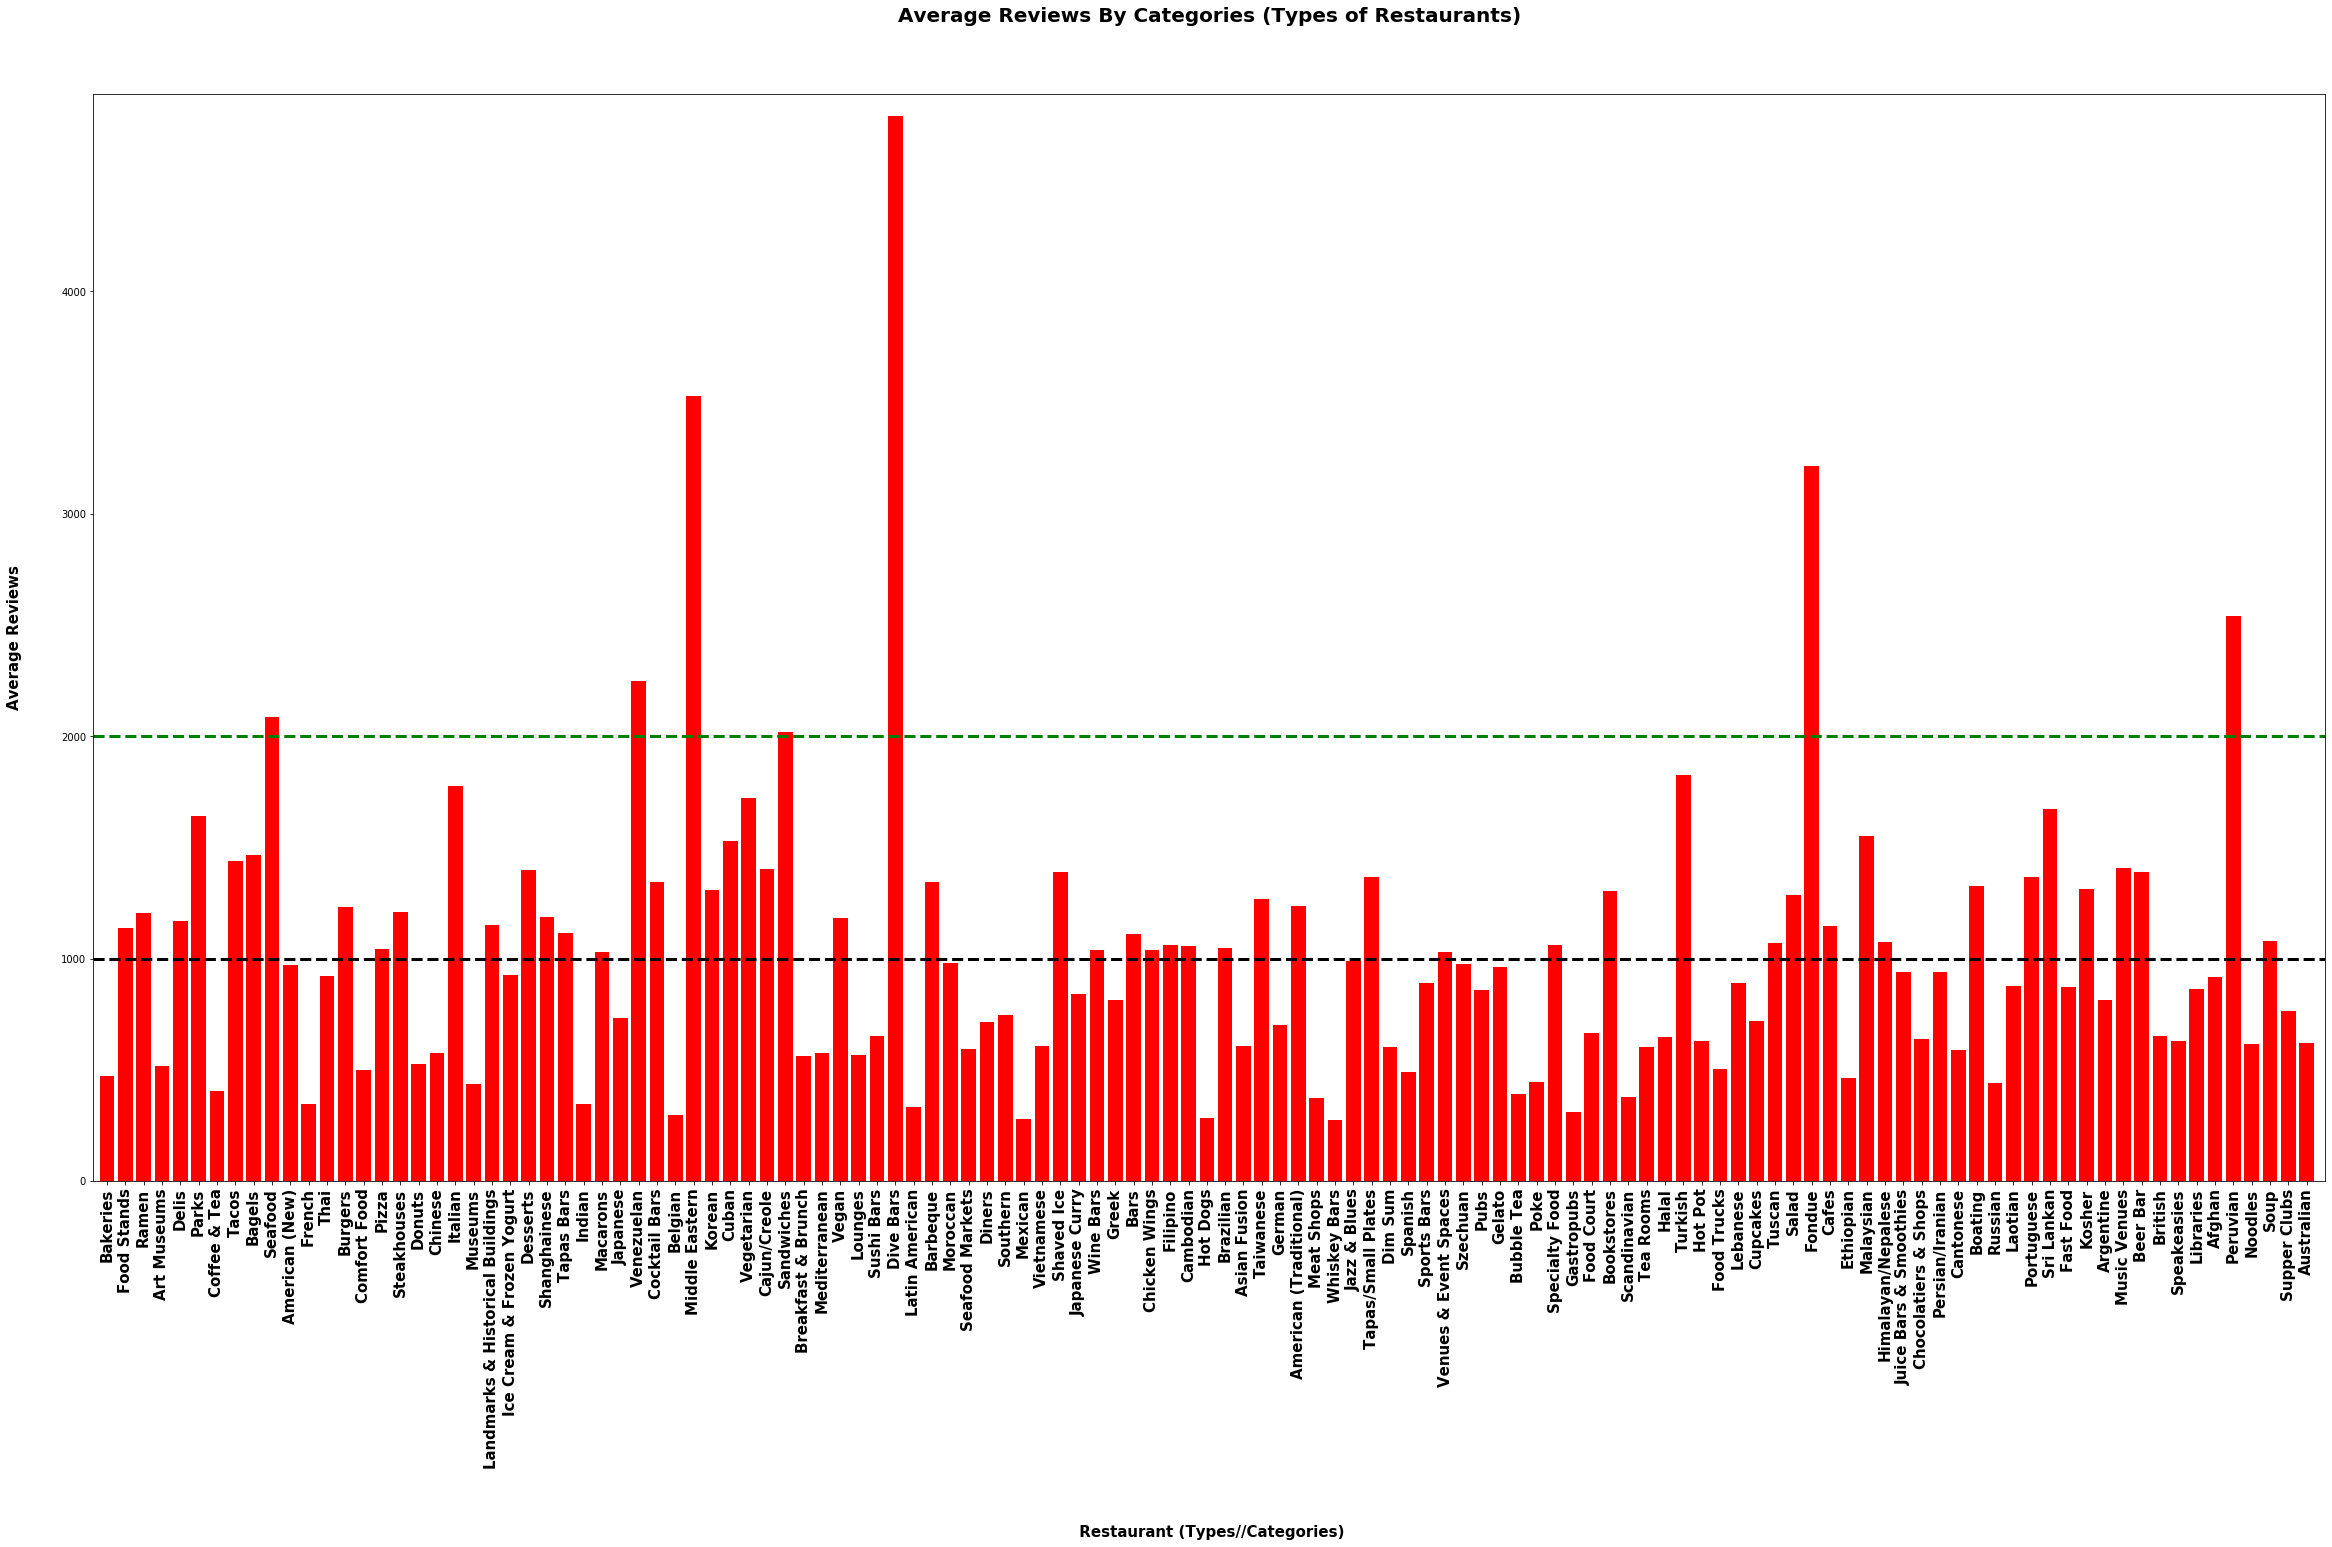

In [11]:
# Bar Graph 

east_bar_avg_review = east_category_stats_df["Average # of Reviews per Restaurant"]
x_axis = east_category_unique # len is = 28
# x_axis

plt.figure(figsize=(40,20))

ax = plt.bar(x_axis, east_bar_avg_review, color='red', alpha=1, align='center')

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, east_category_unique, rotation=90, weight="bold", fontsize=15);

plt.xlim(-0.75, len(x_axis));
plt.ylim(0, max(east_bar_avg_review)+100);

# threshold = 4000
# above_threshold = np.maximum(bar_avg_review - threshold, 0)
# below_threshold = np.minimum(bar_avg_review, threshold)
# fig, ax = plt.subplots()
# ax.bar(x_axis, below_threshold, 0.35, color="g")
# ax.bar(x_axis, above_threshold, 0.35, color="r",
#         bottom=below_threshold)
# ax.plot([-0.75, 30], [threshold, threshold], "k--")

plt.title("Average Reviews By Categories (Types of Restaurants)\n\n\n", fontsize=20, weight="bold");
plt.ylabel("Average Reviews\n\n", weight="bold", fontsize=15);
plt.xlabel("\n\n\n Restaurant (Types//Categories)", weight="bold", fontsize=15);


# axhline -  adding a line that represents a good threshold
# 1000 being a good standard average 
# 3000 + being above average
plt.axhline(y=2000, xmin=0, xmax=28, color="g", linewidth=3, linestyle='--');
plt.axhline(y=1000, xmin=0, xmax=28, color="k", linewidth=3, linestyle='--');
plt.savefig("BarGraph_Average_Reviews_By_Categories.png")

# print("MEAN")
# print(bar_avg_review.mean())
# print("MEDIAN")
# print(bar_avg_review.median())
# print("MODE")
# print(bar_avg_review.mode())

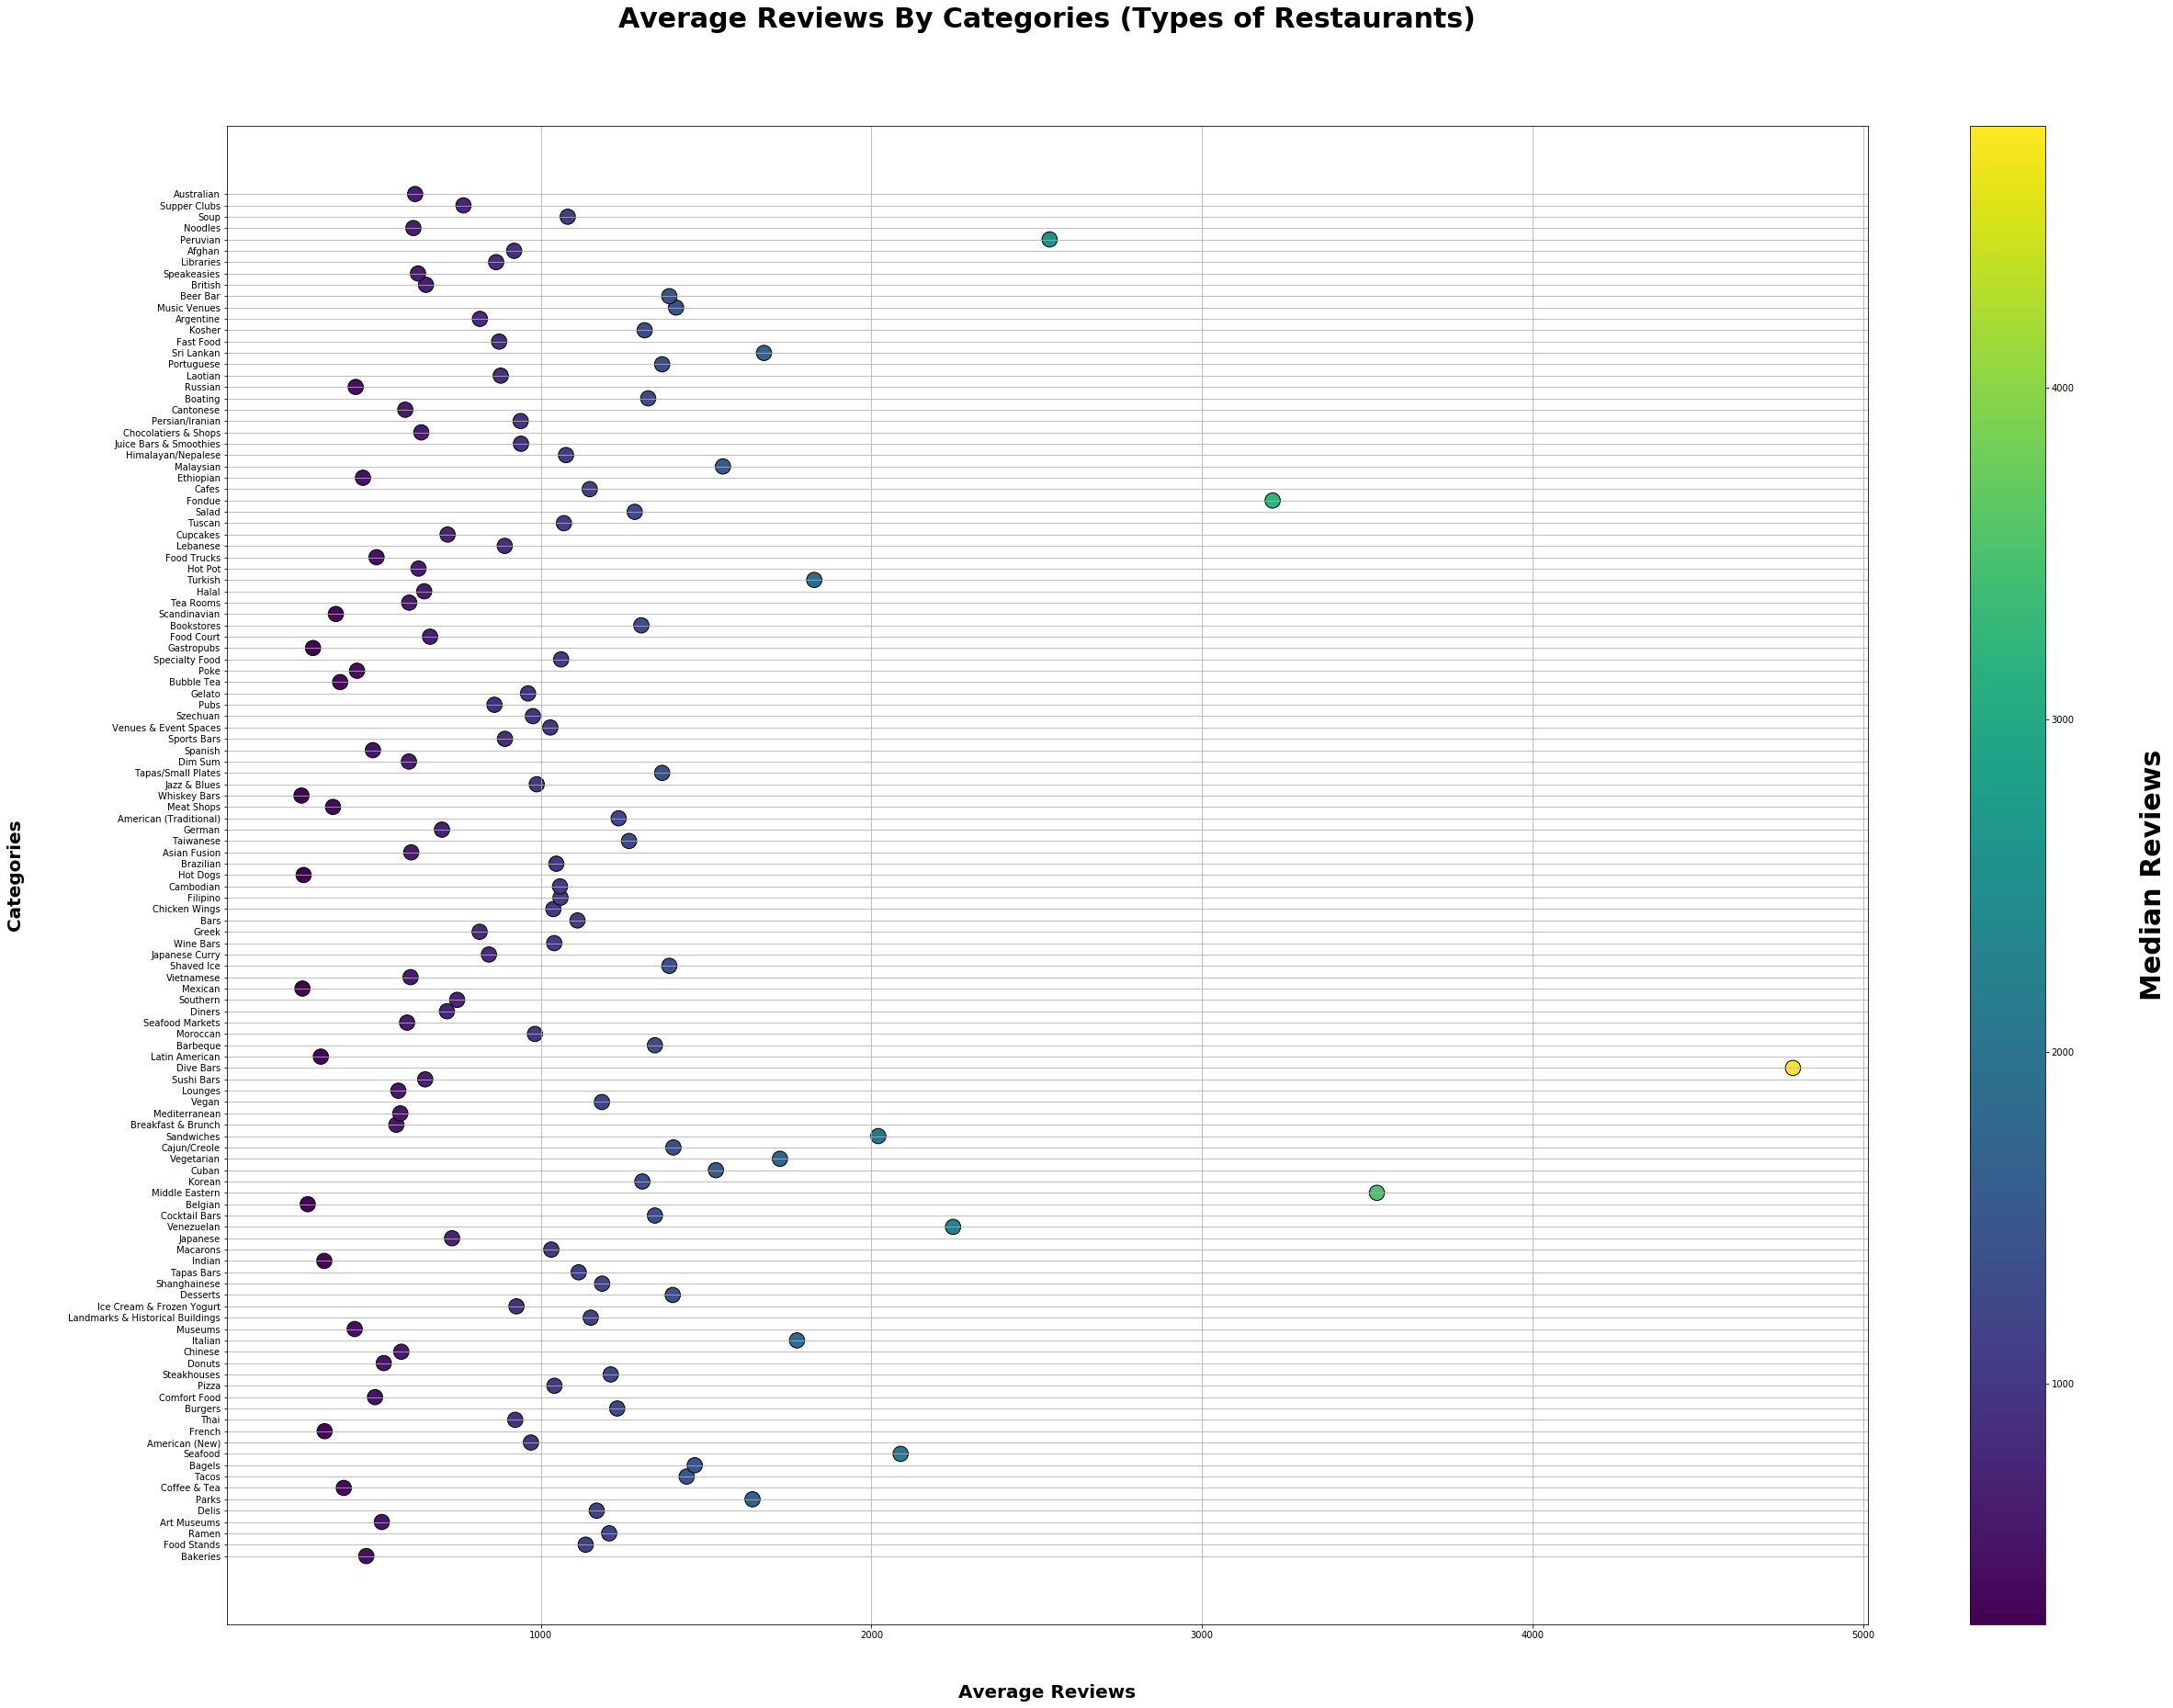

In [12]:
# Scatter Plot 

plt.figure(figsize=(40,30))

plt.scatter(east_bar_avg_review, x_axis, c=east_bar_avg_review, s=275, edgecolor="black")
clb = plt.colorbar()
plt.grid()


plt.xlabel("\n\nAverage Reviews", fontsize=20, weight="bold");
plt.ylabel("Categories\n\n", fontsize=20, weight="bold");
plt.title("Average Reviews By Categories (Types of Restaurants)\n\n\n", fontsize=30, weight="bold");
clb.set_label("\n\nMedian Reviews", fontsize=30, weight="bold")

plt.savefig("ScatterPlot_Average_Reviews_By_Categories.png")


In [15]:
# need a location variable to plot heatmap

newyork_coordinates = east_data[["Latitude", "Longitude"]]
# newyork_coordinates

weights = east_data["Reviews"].astype(float)
gmaps.configure(api_key= gkey)

In [16]:
# Heatmap 

fig = gmaps.figure()

heatmap_layer = gmaps.heatmap_layer(newyork_coordinates, weights=weights,
                                   max_intensity=100,
                                   point_radius=10)
fig.add_layer(heatmap_layer)

fig


Figure(layout=FigureLayout(height='420px'))

# California Breakdown - SanFrancisco

In [ ]:
#create a table discussing the total of sample pulled compared to total places reviewed by yelp

In [ ]:
#North Vs South Vs East Vs West

In [ ]:
#distribution of categories by region

In [ ]:
#come up with distribution of plots.  Take the sample and scatter plot the samples with star ratings to number of ratings
#scatter plot for sample of distribution, normal test? regression? try and distinguish correleations.